In [43]:
import csv
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import random
from joblib import dump
from joblib import load
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error , r2_score

In [44]:
my_file = pd.read_csv("Salary Prediction of Data Professions.csv")

In [45]:
my_file.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [46]:
data = pd.DataFrame(my_file)
data = data.dropna()
data = data.drop_duplicates()

In [47]:
print(len(data))

2470


In [48]:
data.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
6,ELLIOT,AGULAR,M,09-02-2013,01-07-2016,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0
8,KATHY,ALSOP,F,6-29-2014,01-07-2016,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2470 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2470 non-null   object 
 1   LAST NAME         2470 non-null   object 
 2   SEX               2470 non-null   object 
 3   DOJ               2470 non-null   object 
 4   CURRENT DATE      2470 non-null   object 
 5   DESIGNATION       2470 non-null   object 
 6   AGE               2470 non-null   float64
 7   SALARY            2470 non-null   int64  
 8   UNIT              2470 non-null   object 
 9   LEAVES USED       2470 non-null   float64
 10  LEAVES REMAINING  2470 non-null   float64
 11  RATINGS           2470 non-null   float64
 12  PAST EXP          2470 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 270.2+ KB


In [50]:
data.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2470.000000,2470.000000,2470.000000,2470.000000,2470.000000,2470.000000
mean,24.725506,58055.764777,22.490688,7.509312,3.482186,1.555870
std,3.908838,36776.484770,4.597236,4.597236,1.115217,2.703656
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43401.250000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46737.500000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,50323.750000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


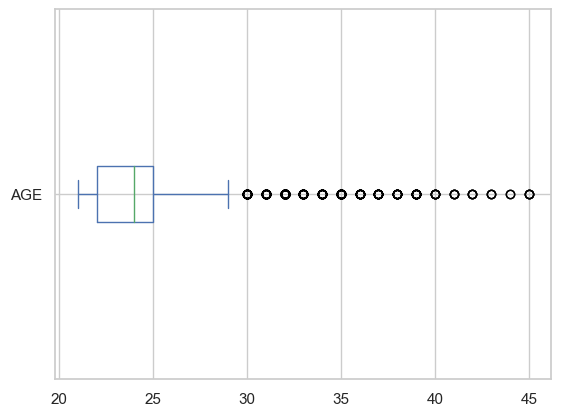

In [51]:
box_age_plot = data["AGE"].plot(kind = "box" , vert = False)

Text(0, 0.5, 'Age Density')

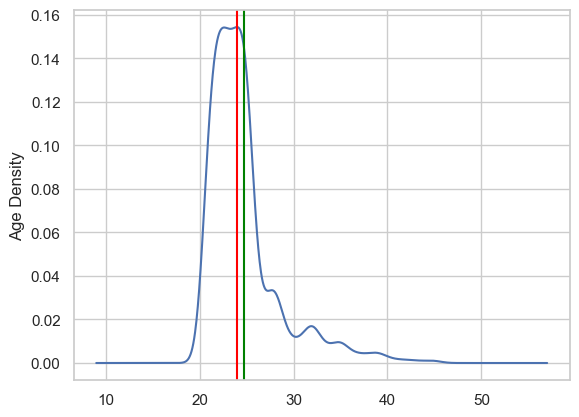

In [52]:
plot = data["AGE"].plot(kind = "density")
plot.axvline(data["AGE"].mean() , color = "green")
plot.axvline(data["AGE"].median() , color = "red")
plot.set_ylabel('Age Density')

In [53]:
# Print the maximum value in the AGE column
max_age = data["AGE"].max()
print("\nMaximum value in AGE column:", max_age)

# Print the minimum value in the AGE column
min_age = data["AGE"].min()
print("Minimum value in AGE column:", min_age)


Maximum value in AGE column: 45.0
Minimum value in AGE column: 21.0


Text(0, 0.5, 'salary Density')

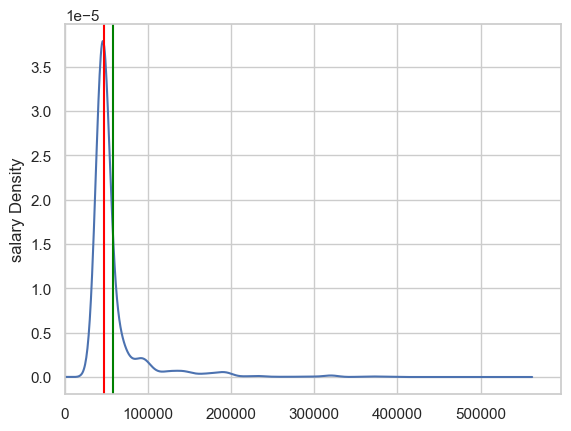

In [54]:
plot = data["SALARY"].plot(kind = "density")
plot.set_xlim(left=0)
plot.axvline(data["SALARY"].mean() , color = "green")
plot.axvline(data["SALARY"].median() , color = "red")
plot.set_ylabel('salary Density')

SEX
F    1255
M    1215
Name: count, dtype: int64


Text(0, 0.5, 'Frequency')

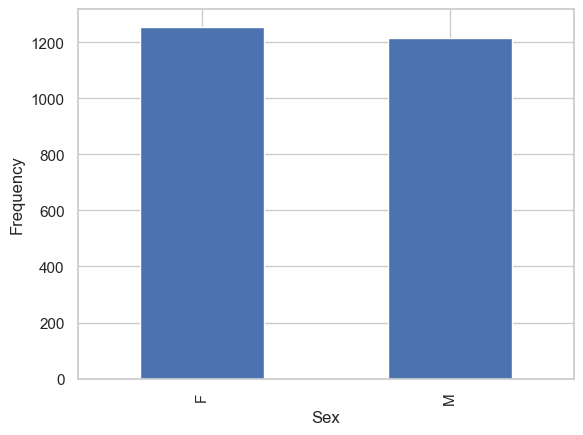

In [55]:
plot = data['SEX'].value_counts().plot(kind='bar')

print(data['SEX'].value_counts())
# Set the x-label and y-label
plot.set_xlabel('Sex')
plot.set_ylabel('Frequency')

DESIGNATION
Analyst           1848
Senior Analyst     301
Associate          155
Manager             79
Senior Manager      60
Director            27
Name: count, dtype: int64


Text(0, 0.5, 'Frequency')

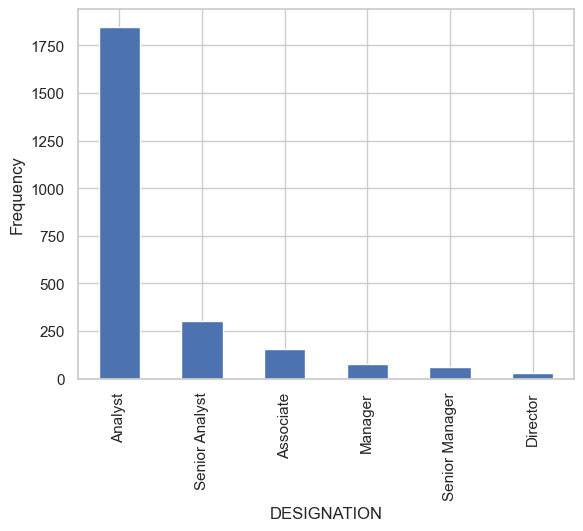

In [56]:
plot = data['DESIGNATION'].value_counts().plot(kind='bar')

print(data['DESIGNATION'].value_counts())
# Set the x-label and y-label
plot.set_xlabel('DESIGNATION')
plot.set_ylabel('Frequency')

UNIT
IT            436
Finance       416
Operations    415
Marketing     409
Web           397
Management    397
Name: count, dtype: int64


Text(0, 0.5, 'Frequency')

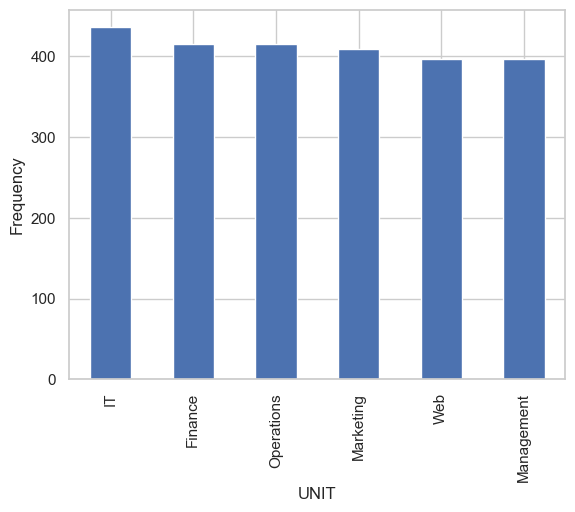

In [57]:
plot = data['UNIT'].value_counts().plot(kind='bar')

print(data['UNIT'].value_counts())
# Set the x-label and y-label
plot.set_xlabel('UNIT')
plot.set_ylabel('Frequency')

0       599 days
2       528 days
3      1009 days
6       857 days
8       557 days
          ...   
2634   1654 days
2635    723 days
2636    714 days
2637    661 days
2638    476 days
Length: 2470, dtype: timedelta64[ns]
*********************
0        599.0
2        528.0
3       1009.0
6        857.0
8        557.0
         ...  
2634    1654.0
2635     723.0
2636     714.0
2637     661.0
2638     476.0
Length: 2470, dtype: float64
*********************
0        599.0
2        528.0
3       1009.0
6        857.0
8        557.0
         ...  
2634    1654.0
2635     723.0
2636     714.0
2637     661.0
2638     476.0
Name: EXP DURATION, Length: 2470, dtype: float64


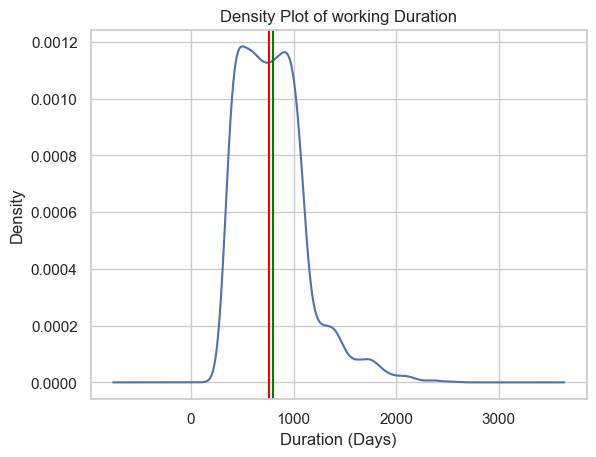

In [58]:
doj = pd.to_datetime(data["DOJ"]) 
current_date = pd.to_datetime(data["CURRENT DATE"])
duration = current_date - doj
print(duration)
duration = duration / pd.Timedelta(days=1)
print("*********************")
print(duration)
print("*********************")
data["EXP DURATION"] = duration
print(data["EXP DURATION"])

#print( data["EXP DURATION"])
plot = duration.plot(kind='density')
plt.xlabel('Duration (Days)')
plt.title('Density Plot of working Duration')

plot.axvline(duration.mean() , color = "green")
plot.axvline(duration.median() , color = "red")

plt.show()



In [59]:
data.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,EXP DURATION
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,599.0
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,528.0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,1009.0
6,ELLIOT,AGULAR,M,09-02-2013,01-07-2016,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0,857.0
8,KATHY,ALSOP,F,6-29-2014,01-07-2016,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1,557.0


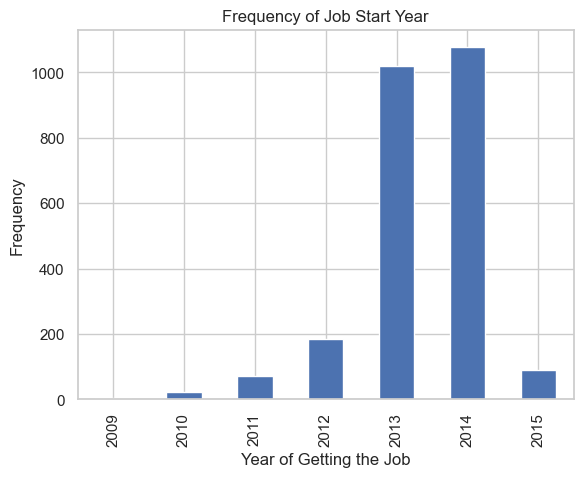

In [60]:
doj = pd.to_datetime(doj)

# Extract year from "DOJ" and plot the frequency
plot = doj.dt.year.value_counts().sort_index().plot(kind='bar')

# Set labels
plot.set_xlabel('Year of Getting the Job')
plot.set_ylabel('Frequency')
plot.set_title('Frequency of Job Start Year')

# Show plot
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


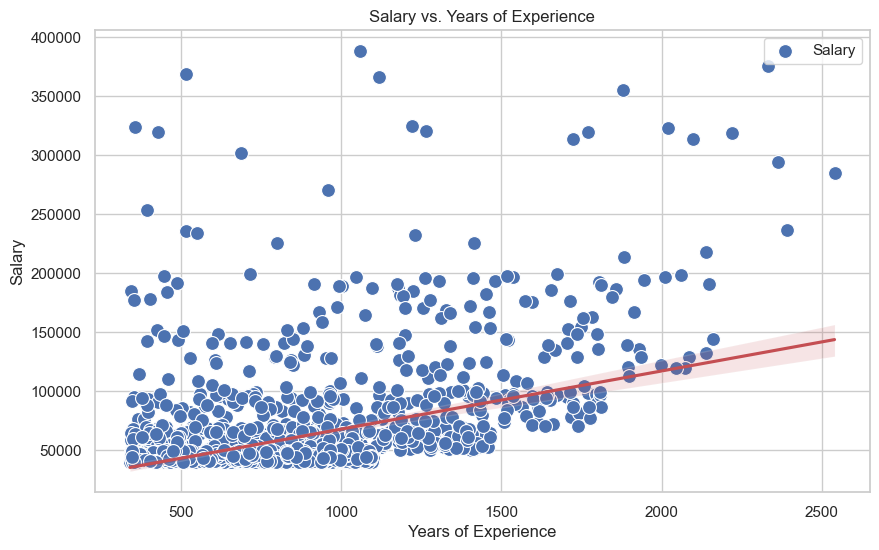

In [61]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='EXP DURATION', y='SALARY', data=data, s=100, color='b', label='Salary')

# Add a regression line
sns.regplot(x='EXP DURATION', y='SALARY', data=data, scatter=False, color='r')

# Set the title and labels
plt.title('Salary vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()

# Show the plot
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


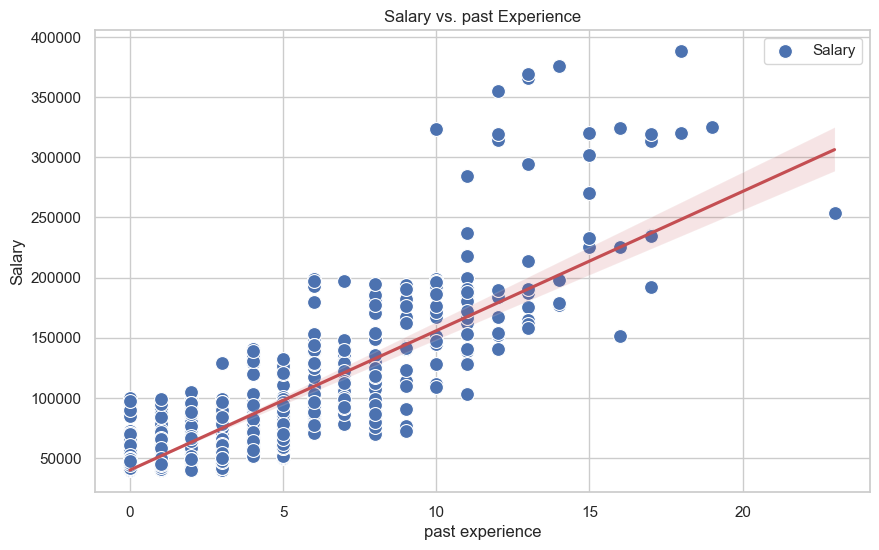

In [62]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PAST EXP', y='SALARY', data=data, s=100, color='b', label='Salary')

# Add a regression line
sns.regplot(x='PAST EXP', y='SALARY', data=data, scatter=False, color='r')

# Set the title and labels
plt.title('Salary vs. past Experience')
plt.xlabel('past experience')
plt.ylabel('Salary')
plt.legend()

# Show the plot
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


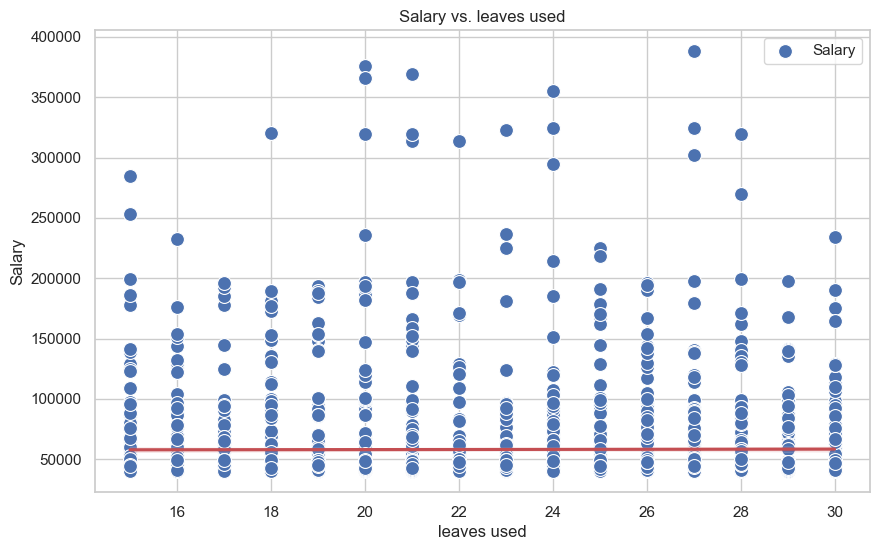

In [63]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LEAVES USED', y='SALARY', data=data, s=100, color='b', label='Salary')

# Add a regression line
sns.regplot(x='LEAVES USED', y='SALARY', data=data, scatter=False, color='r')

# Set the title and labels
plt.title('Salary vs. leaves used')
plt.xlabel('leaves used')
plt.ylabel('Salary')
plt.legend()

# Show the plot
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


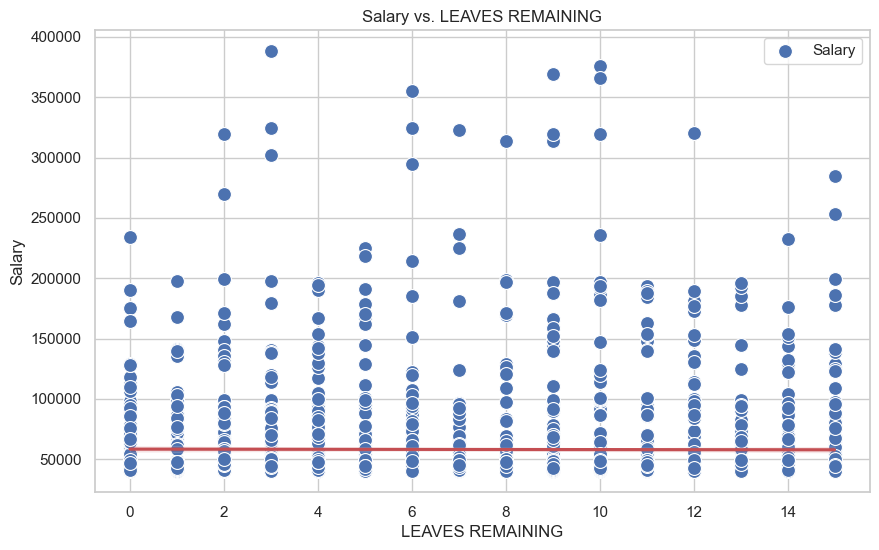

In [64]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LEAVES REMAINING', y='SALARY', data=data, s=100, color='b', label='Salary')

# Add a regression line
sns.regplot(x='LEAVES REMAINING', y='SALARY', data=data, scatter=False, color='r')

# Set the title and labels
plt.title('Salary vs. LEAVES REMAINING')
plt.xlabel('LEAVES REMAINING')
plt.ylabel('Salary')
plt.legend()

# Show the plot
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


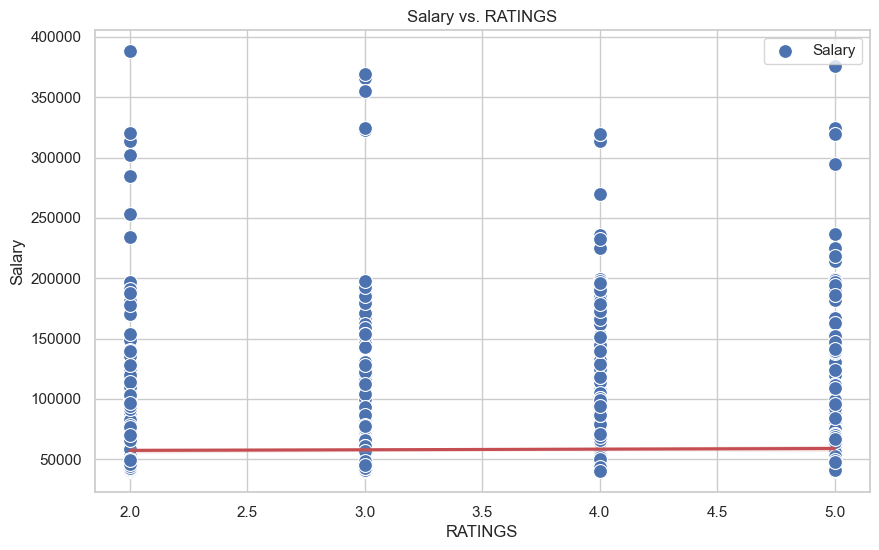

In [65]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RATINGS', y='SALARY', data=data, s=100, color='b', label='Salary')

# Add a regression line
sns.regplot(x='RATINGS', y='SALARY', data=data, scatter=False, color='r')

# Set the title and labels
plt.title('Salary vs. RATINGS')
plt.xlabel('RATINGS')
plt.ylabel('Salary')
plt.legend()

# Show the plot
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


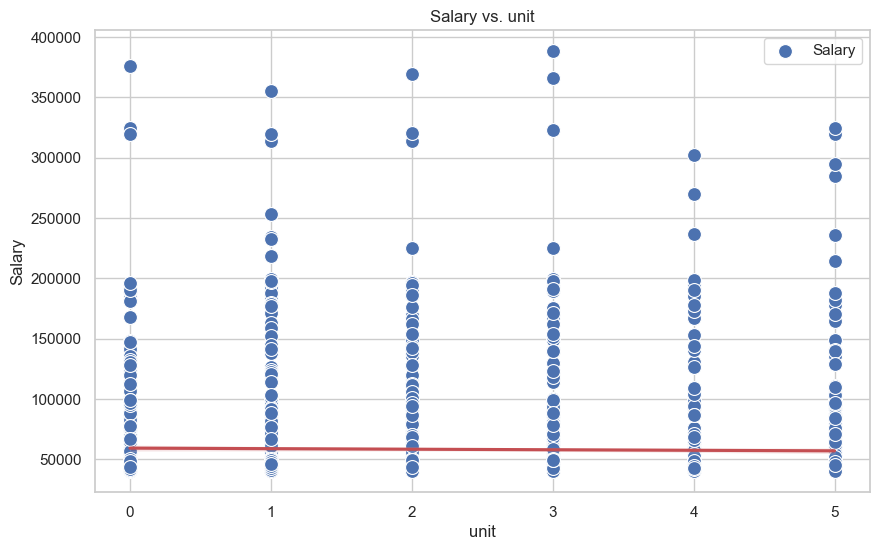

In [66]:
le_unit = LabelEncoder()
data["UNIT"] = le_unit.fit_transform(data["UNIT"])

# Set the style of the plot
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UNIT', y='SALARY', data=data, s=100, color='b', label='Salary')

# Add a regression line
sns.regplot(x='UNIT', y='SALARY', data=data, scatter=False, color='r')

# Set the title and labels
plt.title('Salary vs. unit')
plt.xlabel('unit')
plt.ylabel('Salary')
plt.legend()

# Show the plot
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


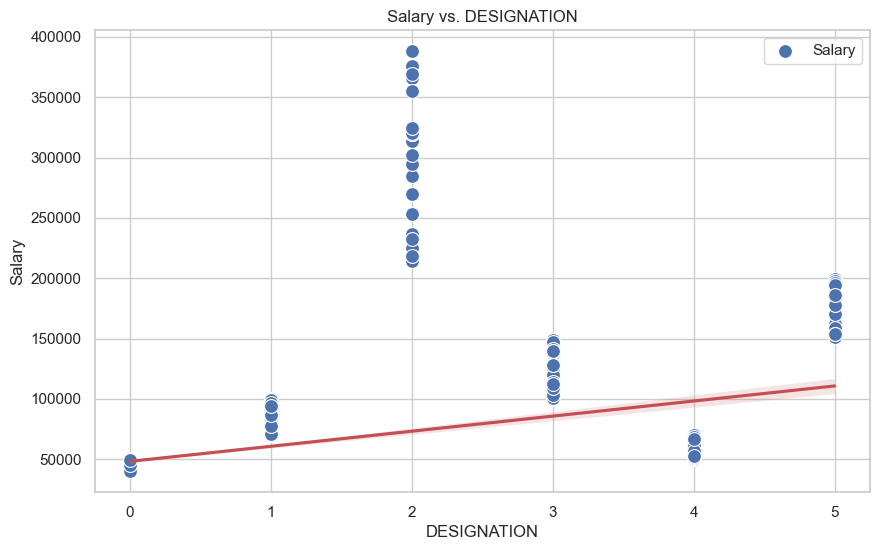

In [67]:
le_designation = LabelEncoder()
data["DESIGNATION"] = le_designation.fit_transform(data["DESIGNATION"])

# Set the style of the plot
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DESIGNATION', y='SALARY', data=data, s=100, color='b', label='Salary')

# Add a regression line
sns.regplot(x='DESIGNATION', y='SALARY', data=data, scatter=False, color='r')

# Set the title and labels
plt.title('Salary vs. DESIGNATION')
plt.xlabel('DESIGNATION')
plt.ylabel('Salary')
plt.legend()

# Show the plot
plt.show()

In [68]:
print(data.columns)

Index(['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE', 'DESIGNATION',
       'AGE', 'SALARY', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS',
       'PAST EXP', 'EXP DURATION'],
      dtype='object')


In [69]:
data = data.drop(columns=['FIRST NAME' , 'LAST NAME' , 'CURRENT DATE' , 'LEAVES USED' , 'LEAVES REMAINING' , 'RATINGS' , 'UNIT' , 'DOJ'])

In [70]:
data.head()

,SEX,DESIGNATION,AGE,SALARY,PAST EXP,EXP DURATION
0,F,0,21.0,44570,0,599.0
2,F,0,21.0,40955,0,528.0
3,F,0,22.0,45550,0,1009.0
6,M,0,22.0,40339,0,857.0
8,F,4,28.0,63478,1,557.0


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2470 entries, 0 to 2638
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SEX           2470 non-null   object 
 1   DESIGNATION   2470 non-null   int32  
 2   AGE           2470 non-null   float64
 3   SALARY        2470 non-null   int64  
 4   PAST EXP      2470 non-null   int64  
 5   EXP DURATION  2470 non-null   float64
dtypes: float64(2), int32(1), int64(2), object(1)
memory usage: 125.4+ KB


In [72]:
le_sex = LabelEncoder()
data["SEX"] = le_sex.fit_transform(data["SEX"])

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2470 entries, 0 to 2638
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SEX           2470 non-null   int32  
 1   DESIGNATION   2470 non-null   int32  
 2   AGE           2470 non-null   float64
 3   SALARY        2470 non-null   int64  
 4   PAST EXP      2470 non-null   int64  
 5   EXP DURATION  2470 non-null   float64
dtypes: float64(2), int32(2), int64(2)
memory usage: 115.8 KB


In [74]:
print(data.columns)

Index(['SEX', 'DESIGNATION', 'AGE', 'SALARY', 'PAST EXP', 'EXP DURATION'], dtype='object')


In [75]:
# Shuffle the data
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate features (X) and target (y)
X = data.drop(columns=['SALARY'])  # Replace 'TARGET_COLUMN' with your target column name
y = data['SALARY']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (optional but recommended for neural networks)
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [76]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(1976, 5)
(494, 5)
(1976,)


In [77]:
missing_values = y_train.isnull().sum()
print("Missing values in y_train:", missing_values)

Missing values in y_train: 0


In [78]:
model = linear_model.LinearRegression()

In [79]:
model.fit(X_train , y_train )

LinearRegression()

In [80]:
model_filename = 'linear_regression_model.joblib'
dump(model, model_filename)
dump(le_designation , "le_designation.joblib")
dump(le_sex , "le_sex.joblib")
dump(scaler , "scaler.joblib")

['scaler.joblib']

In [81]:
loaded_model = load(model_filename)

In [82]:
random_test = random.randint(0,50)
predection = loaded_model.predict(X_test)[random_test]
true_value = list(y_test)[random_test]

print("predection is: " , predection )
print("true value is: " , true_value)
print("the absolute error difference is: " , abs(predection - true_value))

predection is:  57822.41633616274
true value is:  56430
the absolute error difference is:  1392.4163361627434


In [83]:
y_pred = loaded_model.predict(X_test)

In [84]:
print("model coefficients: " , loaded_model.coef_)
print("model intercept: " , loaded_model.intercept_)
print("mean squared error: %.2f"  %  mean_squared_error(y_test , y_pred))
print("score of determination: %.2f"  % r2_score(y_test , y_pred))

model coefficients:  [ -581.4226396    192.38960459  9419.99046267 21699.0173986
  6834.31380112]
model intercept:  58141.63461538462
mean squared error: 269367394.15
score of determination: 0.77
